## Pre-Processing

In [1]:
"""Pre-Process Data

Convert the raw data counts into sc-RNAseq compatible data format.

Structure:
    1. Imports, Variables, Functions
    2. Load Data
    3. Convert to `adata` object

"""

# 1. Imports, Variables, Functions
# imports
import numpy as np, os, sys, pandas as pd, scanpy as sc
import anndata as ad
import logging
from tqdm import tqdm

logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(message)s")
from matplotlib import pyplot as plt

In [2]:
# variables
diseases_of_interest_set = {"Influenza", "Colorectal Carcinoma", "Breast Cancer"}
diseases_of_interest_set = {
    "Crohn's Disease",
    "Ulcerative Colitis",
    "Lung Cancer",
    "Lung Adenocarcinoma",
    "Breast Cancer",
    "Psoriasis",
}

example_data_path = (
    "/aloy/home/ddalton/projects/disease_signatures/data/DiSignAtlas/tmp/DSA00123.csv"
)

df_info_path = os.path.join(
    "/aloy",
    "home",
    "ddalton",
    "projects",
    "disease_signatures",
    "data",
    "DiSignAtlas",
    "Disease_information_Datasets_extended.csv",
)


large_df_path = "/aloy/home/ddalton/projects/disease_signatures/data/DiSignAtlas/DiSignAtlas.exp_prof_merged.csv"


# functions
def get_skip_rows(dsaids_interest):
    """Get Skip Rows
    Args:
        - dsaids_interest (list): List of DSAIDs of interest
    Returns:
        skip_rows_idxs (np.array): Array of indexes to skip
    """
    # variables
    large_df_path = "/aloy/home/ddalton/projects/disease_signatures/data/DiSignAtlas/DiSignAtlas.exp_prof_merged.csv"

    # load entire dataframe ID column only
    id_values = pd.read_csv(large_df_path, usecols=["ID"])["ID"].values

    # get indexes to skip
    skip_rows_idxs = np.argwhere(
        ~np.isin([x.split(";")[0] for x in id_values], dsaids_interest)
    ).flatten()

    skip_rows_idxs = skip_rows_idxs + 1  # add 1 to skip

    logging.info(f"Skipping {len(skip_rows_idxs)} rows")
    return skip_rows_idxs


def get_exp_prof(dsaids_interest):
    """Get Expression Profiles"""

    # variables
    file_dir = "/aloy/home/ddalton/projects/disease_signatures/data/DiSignAtlas/tmp/"
    first = True
    for dsaid in tqdm(dsaids_interest):
        __df = pd.read_csv(os.path.join(file_dir, f"{dsaid}.csv"))
        if first:
            df_global = __df
            first = False
        else:
            df_global = pd.concat([df_global, __df], axis=0)
    return df_global


# 2. Load Data
# df = pd.read_csv(example_data_path)

df_info = pd.read_csv(df_info_path)


# Query data to retrieve dsaids of interest
library_strategies_of_interest_set = {"RNA-seq", "Microarray"}
QUERY = "disease in @diseases_of_interest_set & library_strategy in @library_strategies_of_interest_set & organism == 'Homo sapiens'"
dsaids_interest = df_info.query(QUERY)["dsaid"].to_list()
logging.info(f"Nº of DSAIDs of interest: {len(dsaids_interest)}")

# skip_rows_idxs = get_skip_rows(dsaids_interest)

df = get_exp_prof(dsaids_interest)

2024-08-09 12:48:21,254 - Nº of DSAIDs of interest: 224
100%|██████████| 224/224 [03:23<00:00,  1.10it/s]


In [16]:
QUERY = "disease in @diseases_of_interest_set & library_strategy in @library_strategies_of_interest_set & organism == 'Homo sapiens'"

df_info.query(QUERY)["disease"].value_counts()

disease
Ulcerative Colitis     72
Breast Cancer          64
Psoriasis              57
Lung Adenocarcinoma    19
Lung Cancer            12
Name: count, dtype: int64

In [26]:
df_info[df_info["disease"] == "Crohn's Disease"]

,dsaid,accession,platform,deg_count,disease,diseaseid,tissue,data_source,library_strategy,organism,control_case_sample_count,definition,Control,Case
308,DSA00309,GSE102133,GPL6244,1000,Crohn's Disease,C0010346,Ileum,GEO,Microarray,Homo sapiens,12|18,DO:An inflammatory bowel disease characterized...,GSM2728650;GSM2728651;GSM2728652;GSM2728653;GS...,GSM2728679;GSM2728680;GSM2728681;GSM2728682;GS...
309,DSA00310,GSE102133,GPL6244,1000,Crohn's Disease,C0010346,Ileum,GEO,Microarray,Homo sapiens,12|14,DO:An inflammatory bowel disease characterized...,GSM2728650;GSM2728651;GSM2728652;GSM2728653;GS...,GSM2728665;GSM2728666;GSM2728667;GSM2728668;GS...
614,DSA00615,GSE110186,GPL23159,1,Crohn's Disease,C0010346,NaN,GEO,Microarray,Homo sapiens,3|3,DO:An inflammatory bowel disease characterized...,GSM2981862;GSM2981863;GSM2981864,GSM2981874;GSM2981875;GSM2981876
615,DSA00616,GSE110186,GPL23159,1,Crohn's Disease,C0010346,NaN,GEO,Microarray,Homo sapiens,3|3,DO:An inflammatory bowel disease characterized...,GSM2981865;GSM2981866;GSM2981867,GSM2981877;GSM2981878;GSM2981879
616,DSA00617,GSE110186,GPL23159,0,Crohn's Disease,C0010346,NaN,GEO,Microarray,Homo sapiens,3|3,DO:An inflammatory bowel disease characterized...,GSM2981868;GSM2981869;GSM2981870,GSM2981880;GSM2981881;GSM2981882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7606,DSA07607,GSE92472,GPL21290,1000,Crohn's Disease,C0010346,Whole blood,GEO,RNA-Seq,Homo sapiens,1|1,DO:An inflammatory bowel disease characterized...,GSM2430380,GSM2430373
9847,DSA09848,GSE1710,GPL284,129,Crohn's Disease,C0010346,Sigmoid colon,GEO,Microarray,Homo sapiens,11|10,DO:An inflammatory bowel disease characterized...,GSM29595;GSM29596;GSM29597;GSM29598;GSM29599;G...,GSM29606;GSM29607;GSM29608;GSM29609;GSM29610;G...
9874,DSA09875,GSE160925,GPL18573,2,Crohn's Disease,C0010346,Terminal ileum,GEO,RNA-Seq,Homo sapiens,3|4,DO:An inflammatory bowel disease characterized...,GSM4886631;GSM4886637;GSM4886640,GSM4886622;GSM4886625;GSM4886628;GSM4886634
9875,DSA09876,GSE160925,GPL18573,2,Crohn's Disease,C0010346,Terminal ileum,GEO,RNA-Seq,Homo sapiens,5|8,DO:An inflammatory bowel disease characterized...,GSM4886629;GSM4886630;GSM4886635;GSM4886638;GS...,GSM4886620;GSM4886621;GSM4886623;GSM4886624;GS...


In [25]:
[x for x in df_info["disease"].unique() if x.startswith("Cr")]

["Crohn's Disease",
 'Cryptorchidism',
 'Cryopyrin-Associated Periodic Syndromes',
 'Craniosynostosis',
 'Critical Illness Myopathy',
 'Critical Limb Ischemia',
 'Cranial Defect']

In [3]:
QUERY = "organism == 'Homo sapiens'"
df_query = df_info.query(QUERY)
logging.info(f"Nº of signatures {df_query.shape[0]}")
logging.info(f"Nº of diseases {df_query['disease'].nunique()}")
logging.info(f"Nº of diseases {df_query['accession'].nunique()}")

2024-08-09 12:51:44,899 - Nº of signatures 7194
2024-08-09 12:51:44,900 - Nº of diseases 1454
2024-08-09 12:51:44,901 - Nº of diseases 3666


In [4]:
QUERY = "(library_strategy == 'RNA-seq' | library_strategy == 'Microarray') & organism == 'Homo sapiens'"
df_info.query(QUERY)["disease"].value_counts()[:20]

disease
Asthma                                   101
Influenza                                 99
Systemic Lupus Erythematosus              72
Ulcerative Colitis                        72
Hepatocellular Carcinoma                  68
Schizophrenia                             65
Breast Cancer                             64
Alzheimer's Disease                       63
Crohn's Disease                           62
Chronic Obstructive Pulmonary Disease     60
Psoriasis                                 57
Rheumatoid Arthritis                      51
Parkinson's Disease                       51
Colorectal Carcinoma                      49
Multiple Sclerosis                        45
Sepsis                                    41
Acute Myeloid Leukemia (Aml-M2)           41
Type 1 Diabetes                           39
Tuberculosis                              39
Chronic Lymphocytic Leukemia              39
Name: count, dtype: int64

In [5]:
# load dataframe
# df = pd.read_csv(large_df_path, skiprows=skip_rows_idxs, index_col=0)
logging.info(f"Loaded dataframe with shape: {df.shape}")

# drop non significant rows
# Calculate the number of NaNs in each row
nan_counts = df.isna().sum(axis=1)

# Filter the DataFrame to keep only rows with NaNs less than or equal to 18,000
df = df[nan_counts <= 18000]
logging.info(f"Filtered dataframe with shape: {df.shape}")


# Filter out Unknown samples
mask = [False if id.split(";")[2] == "Unknown" else True for id in df.iloc[:, 0].values]

df = df[mask]

logging.info(f"Filtered out Unkowns from dataframe with shape: {df.shape}")


# 3. Convert to `adata` object
# Extract cell identifiers and gene expression data
ids = df.iloc[:, 0]
gene_expression_data = df.iloc[:, 1:].values
gene_names = df.columns[1:]


# Create an AnnData object
adata = ad.AnnData(X=gene_expression_data)


# Add cell and gene metadata
adata.obs["ids"] = ids.values
adata.var["gene_symbols"] = gene_names
adata.var["index"] = gene_names

2024-08-09 12:51:44,915 - Loaded dataframe with shape: (8403, 19691)
2024-08-09 12:51:45,236 - Filtered dataframe with shape: (8340, 19691)
2024-08-09 12:51:45,408 - Filtered out Unkowns from dataframe with shape: (8183, 19691)


<BarContainer object of 4 artists>

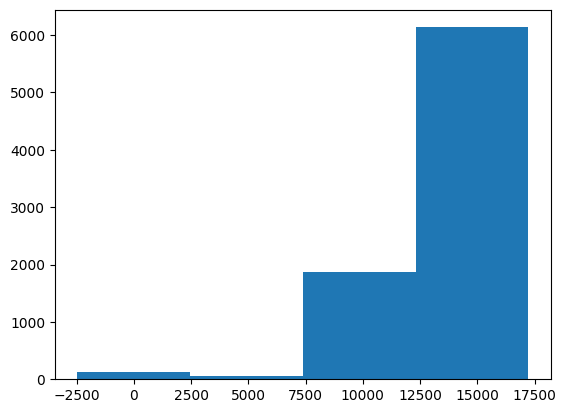

In [6]:
(~np.isnan(adata.X)).sum(axis=1)

bins = np.arange(0, 19690 + 1, 19690 / 4)

counts, _ = np.histogram((~np.isnan(adata.X)).sum(axis=1), bins=bins)

# plot counts
plt.bar(bins[:-1], counts, width=bins[1] - bins[0])

In [10]:
d_data = dict()
d_data["n_diseases"] = dict()
d_data["n_controls"] = dict()
d_data["n_datasets"] = dict()
d_data["n_genes"] = dict()
d_data["n_de_signatures"] = dict()


for disease in diseases_of_interest_set:
    # Nº Disease Samples
    dsaid_disease = df_info.query(f"disease == @disease")["dsaid"].to_list()

    n_diseases = 0
    for id in ids.to_list():
        if id.split(";")[0] in dsaid_disease:
            if id.split(";")[2] == "Case":
                n_diseases += 1

    logging.info(f"{disease} Nº of Diseases: {n_diseases}")

    # Nº of Control Samples
    dsaid_disease = df_info.query(f"disease == @disease")["dsaid"].to_list()

    n_controls = 0
    for id in ids.to_list():
        if id.split(";")[0] in dsaid_disease:
            if id.split(";")[2] == "Control":
                n_controls += 1

    logging.info(f"{disease} Nº Controls: {n_controls}")

    # Nº of Datasets
    dsaid_disease = df_info.query(f"disease == @disease")["dsaid"].to_list()

    dsaid_selected = list(
        set(dsaid_disease) & set([x.split(";")[0] for x in ids.to_list()])
    )

    # query datasets
    datasets = df_info.query(f"dsaid in @dsaid_selected")["accession"].to_list()

    logging.info(f"{disease} Nº of Datasets: {len(datasets)}")

    # Nº of Genes
    # Nº Disease Samples
    dsaid_disease = df_info.query(f"disease == @disease")["dsaid"].to_list()

    mask = np.isin([x.split(";")[0] for x in ids.to_list()], dsaid_disease)

    n_genes = (~np.isnan(adata.X[mask])).sum(axis=1)

    logging.info(
        f"{disease} Nº of Genes: {np.mean(n_genes):.0f} ± {np.std(n_genes):.0f}"
    )

    # Nº of DE signatures
    n_de_signatures = df_info.query(f"disease == @disease").shape[0]
    logging.info(f"{disease} Nº of DE Signatures: {n_de_signatures}")

    # append to dictionary
    d_data["n_diseases"][disease] = n_diseases
    d_data["n_controls"][disease] = n_controls
    d_data["n_datasets"][disease] = len(datasets)
    d_data["n_genes"][disease] = n_genes
    d_data["n_de_signatures"][disease] = n_de_signatures

2024-08-09 13:00:11,038 - Lung Adenocarcinoma Nº of Diseases: 335
2024-08-09 13:00:11,043 - Lung Adenocarcinoma Nº Controls: 305
2024-08-09 13:00:11,048 - Lung Adenocarcinoma Nº of Datasets: 19
2024-08-09 13:00:11,091 - Lung Adenocarcinoma Nº of Genes: 15168 ± 2614
2024-08-09 13:00:11,094 - Lung Adenocarcinoma Nº of DE Signatures: 34
2024-08-09 13:00:11,101 - Psoriasis Nº of Diseases: 960
2024-08-09 13:00:11,109 - Psoriasis Nº Controls: 883
2024-08-09 13:00:11,114 - Psoriasis Nº of Datasets: 57
2024-08-09 13:00:11,231 - Psoriasis Nº of Genes: 16499 ± 2084
2024-08-09 13:00:11,233 - Psoriasis Nº of DE Signatures: 100
2024-08-09 13:00:11,242 - Breast Cancer Nº of Diseases: 1740
2024-08-09 13:00:11,251 - Breast Cancer Nº Controls: 615
2024-08-09 13:00:11,255 - Breast Cancer Nº of Datasets: 63
2024-08-09 13:00:11,396 - Breast Cancer Nº of Genes: 15114 ± 3303
2024-08-09 13:00:11,398 - Breast Cancer Nº of DE Signatures: 105
2024-08-09 13:00:11,407 - Ulcerative Colitis Nº of Diseases: 1776
202

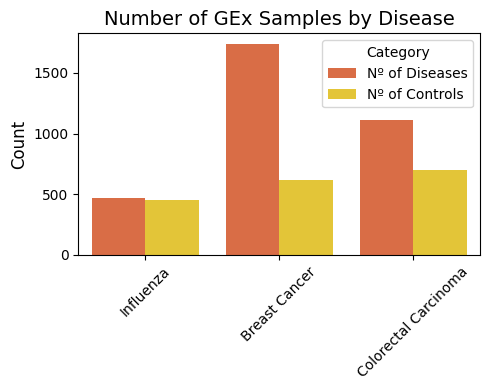

In [ ]:
import seaborn as sns

irb_colors = [
    "#ffd81cff",
    "#f6972dff",
    "#f2612dff",
    "#574270ff",
    "#00589bff",
    "#002f58ff",
]

labels = list(d_data["n_diseases"].keys())
n_controls = [d_data["n_controls"][x] for x in labels]
n_diseases = [d_data["n_diseases"][x] for x in labels]

df_plot = pd.DataFrame(
    {
        "Disease": labels,
        "Nº of Diseases": n_diseases,
        "Nº of Controls": n_controls,
    }
)

# Transform the DataFrame to long format
df_long = df_plot.melt(id_vars="Disease", var_name="Category", value_name="Count")

# Plotting with seaborn
plt.figure(figsize=(5, 4))
sns.barplot(
    data=df_long,
    x="Disease",
    y="Count",
    hue="Category",
    palette=[irb_colors[2], irb_colors[0]],
)

# Adding labels and title
plt.xlabel("", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Number of GEx Samples by Disease", fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("outputs/n_samples.png", dpi=300, bbox_inches="tight")

/tmp/ipykernel_116915/3066084854.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


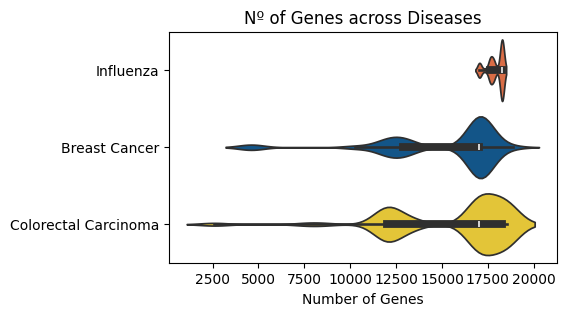

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming d_data is defined and contains the necessary data
labels = list(d_data["n_diseases"].keys())
n_genes = [d_data["n_genes"][x] for x in labels]

flat_genes = []
flat_labels = []
for label, genes_list in zip(labels, n_genes):
    flat_genes.extend(genes_list)
    flat_labels.extend([label] * len(genes_list))

plt.figure(figsize=(5, 3))

# Violin plot
sns.violinplot(
    x=flat_genes, y=flat_labels, palette=[irb_colors[2], irb_colors[4], irb_colors[0]]
)

# Adding titles and labels
plt.xlabel("Number of Genes")
plt.ylabel("")
plt.title("Nº of Genes across Diseases")
plt.savefig("outputs/n_genes.png", dpi=300, bbox_inches="tight")

In [ ]:
df

,ID,A1BG,A2M,NAT1,NAT2,SERPINA3,AADAC,AAMP,AANAT,AARS1,...,LOC105379417,LOC105379473,LOC105379504,LOC105379522,LOC105379545,LOC105379554,LOC105379561,LOC105379585,JMJD7,PLA2G4B
0,DSA00057;GSM2062351;Control,NaN,5.326889,5.553771,6.105156,6.437837,4.645818,6.672881,4.230869,7.927004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DSA00057;GSM2062352;Control,NaN,4.872476,4.834847,5.631617,6.433305,4.182346,6.983392,4.216939,8.549807,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DSA00057;GSM2062353;Control,NaN,4.851107,4.102917,6.018855,6.979048,4.321192,7.275967,3.929195,8.182433,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DSA00057;GSM2062354;Control,NaN,4.949955,5.730215,6.091108,7.029895,4.372360,7.054746,4.277931,8.063355,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DSA00057;GSM2062355;Control,NaN,4.958193,5.371742,6.015699,6.958902,4.331868,6.785818,3.860229,7.823488,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,DSA10295;GSM1012438;Case,NaN,672.000000,98.600000,38.700000,63.800000,23.100000,171.000000,4.200000,605.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,DSA10295;GSM1012444;Case,NaN,856.000000,101.000000,21.500000,57.400000,14.700000,120.000000,6.200000,305.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,DSA10295;GSM1012448;Case,NaN,802.000000,91.600000,28.800000,128.000000,20.400000,158.000000,8.880000,394.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,DSA10295;GSM1012449;Case,NaN,768.000000,97.400000,31.300000,106.000000,15.800000,145.000000,4.720000,326.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
assay_id_2_state = dict()

for assay_id_controls, assay_id_cases in zip(df_info["Control"], df_info["Case"]):
    try:
        for assay_id in assay_id_controls.split(";"):
            assay_id_2_state[assay_id] = "control"

        for assay_id in assay_id_cases.split(";"):
            assay_id_2_state[assay_id] = "disease"
    except AttributeError:
        print(f"AttributeError {assay_id_controls} {assay_id_cases}")

AttributeError nan nan


## Get Embeddings

In [ ]:
"""Get Embeddings from scGPT

Structure:
    1. Imports, Variables, Functions
    2. Load Data
    3. Get Embeddings
    4. Save Embeddings

"""

# 1. Imports, Variables, Functions
# imports
import sys
from pathlib import Path

import numpy as np
import pandas as pd
from scipy.stats import mode
import scanpy as sc
import sklearn
import warnings
import logging

logging.basicConfig(level=logging.INFO)

sys.path.insert(0, "../")
import scgpt as scg


# variables
model_dir = Path("../save/scGPT_human")
# model_dir = Path("../save/scGPT_CP")
# adata = sc.read_h5ad("../data/annotation_pancreas/demo_train.h5ad")
cell_type_key = "Celltype"
gene_col = "gene_symbols"

# functions


# 2. Load Data
# done in pre-processing

# 3. Get Embeddings
ref_embed_adata = scg.tasks.embed_data(
    adata,
    model_dir,
    gene_col=gene_col,
    # obs_to_save=cell_type_key,  # optional arg, only for saving metainfo
    batch_size=64,
    return_new_adata=True,
    device="cuda",
)

# 4. Save Embeddings
ref_embed_adata.write_h5ad("data/tmp/scgpt_embed.h5ad")

scGPT - INFO - match 19061/19690 genes in vocabulary of size 60697.


/home/ddalton/miniconda3/envs/scgpt/lib/python3.10/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer was not TransformerEncoderLayer
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
Embedding cells: 100%|██████████| 80/80 [00:06<00:00, 12.03it/s]
/home/ddalton/miniconda3/envs/scgpt/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


In [ ]:
def get_tissue(ids):
    dsaids = [x.split(";")[0] for x in ids]
    dsaid_2_tissue = dict(zip(df_info["dsaid"], df_info["tissue"]))
    tissues = [str(dsaid_2_tissue[dsaid]) for dsaid in dsaids]
    return tissues


def get_disease(ids):
    dsaids = [x.split(";")[0] for x in ids]
    dsaid_2_disease = dict(zip(df_info["dsaid"], df_info["disease"]))
    diseases = [str(dsaid_2_disease[dsaid]) for dsaid in dsaids]
    return diseases


def get_dataset(ids):
    dsaids = [x.split(";")[0] for x in ids]
    dsaid_2_dataset = dict(zip(df_info["dsaid"], df_info["accession"]))
    datasets = [str(dsaid_2_dataset[dsaid]) for dsaid in dsaids]
    return datasets


# get tissues
tissues = get_tissue(ids)
adata.obs["tissue"] = tissues

# get nº genes
n_genes = (~np.isnan(adata.X)).sum(axis=1)
adata.obs["n_genes"] = n_genes

# get disease
diseases = get_disease(ids)
adata.obs["disease"] = diseases

# get dataset
datasets = get_dataset(ids)
adata.obs["dataset"] = datasets

# get dsaid
dsaids = [x.split(";")[0] for x in ids]
adata.obs["dsaid"] = dsaids

# get state
states = [x.split(";")[2] for x in ids]
adata.obs["state"] = states

# 4. Save raw data
adata.write_h5ad("data/tmp/raw_data.h5ad")

... storing 'tissue' as categorical
... storing 'disease' as categorical
... storing 'dataset' as categorical
... storing 'dsaid' as categorical
... storing 'state' as categorical


In [ ]:
from collections import Counter

Counter(states)

Counter({'Case': 3326, 'Control': 1764})

In [ ]:
# replace nans with zeros
ref_embed_adata_2 = np.nan_to_num(adata.X)

In [ ]:
# pca embeddings on raw data
np.isnan(adata.X).sum(axis=1)

array([7688, 7688, 7688, ..., 7688, 7688, 7688])

## Explore Embeddings

In [ ]:
"""Explore Embeddings

Structure:
    1. Imports, Variables, Functions
    2. PCA Plots
    3. UMAP Plots
    4. Cosine Distance
    5. Pearson Correlation
    6. Euclidean Distance
"""

# 1. Imports, Variables, Functions
# imports
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap, to_rgba_array
from scipy.interpolate import make_interp_spline
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap, to_rgba_array
from scipy.interpolate import make_interp_spline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# variables


# functions
def plot_metrics(values, labels, metric, save=True):

    assert metric in [
        "Cosine Distance",
        "Euclidean Distance",
        "Pearson Correlation",
    ], "Invalid metric"

    min_val = min([x for sublist in values for x in sublist])
    max_val = max([x for sublist in values for x in sublist])

    # Get a color map
    cmap = plt.get_cmap("hsv")

    # Define unique colors
    colors = [cmap(i / len(labels)) for i in range(len(labels))]

    # Define bin range
    bin_range = np.arange(min_val, max_val + 0.01, (max_val - min_val) / 20)

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(4, 4))

    for i, (v, l) in enumerate(zip(values, labels)):

        # Plot control vs control
        density, bins = np.histogram(
            v, bins=bin_range, density=True
        )  # Calculate the density
        bin_centers = 0.5 * (bins[1:] + bins[:-1])  # Calculate the center of each bin
        ax.plot(
            bin_centers, density, "-", color=colors[i], label=l
        )  # Create the density plot

    # Set y-axis limit
    ax.set_ylim(0, np.max(density) * 1.1)

    # Add labels and title
    ax.set_xlabel(f"{metric}")
    ax.set_ylabel("Density")
    ax.set_title(f"Pairwise {metric} Distributions")

    # Add legend
    ax.legend()

    # Show grid
    ax.grid(True)

    # Show plot
    if save:
        plt.savefig(
            f"outputs/pairwise_{metric.lower().replace(' ', '_')}.scgpt.png",
            dpi=300,
            bbox_inches="tight",
        )


def get_pairwise_similarities(matrix, indexes_1, indexes_2=None):

    pairs = list()
    if indexes_2 is not None:

        for i in indexes_1:
            for j in indexes_2:
                pairs.append([i, j])

        pairs = np.array(pairs)
        return matrix[pairs[:, 0], pairs[:, 1]]

    else:
        for n, i in enumerate(indexes_1):
            for j in indexes_1[n + 1 :]:
                pairs.append([i, j])

        pairs = np.array(pairs)
        return matrix[pairs[:, 0], pairs[:, 1]]

### 2. PCA Plots

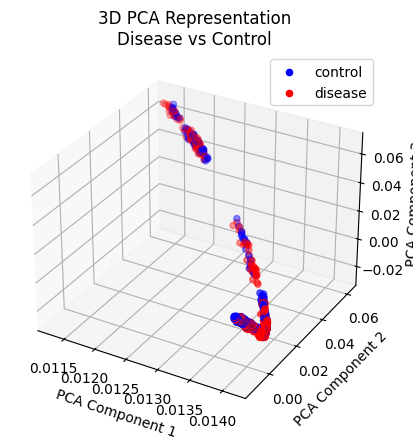

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA with 3 components
pca = PCA(n_components=3)
pca.fit(ref_embed_adata.X.T)

labels = [assay_id_2_state.get(id.split(";")[1]) for id in adata.obs["ids"]]

# Map labels to colors
label_color_map = {"control": "blue", "disease": "red"}
colors = [label_color_map.get(label, "grey") for label in labels]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Scatter plot with colors
ax.scatter(pca.components_[0], pca.components_[1], pca.components_[2], c=colors)

# Adding legend
for label in label_color_map:
    ax.scatter([], [], [], c=label_color_map[label], label=label)
ax.legend()

# Set labels
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("3D PCA Representation\nDisease vs Control")

# Display the plot
plt.savefig("outputs/pca_3d.disease_control.scgpt.png", dpi=300, bbox_inches="tight")

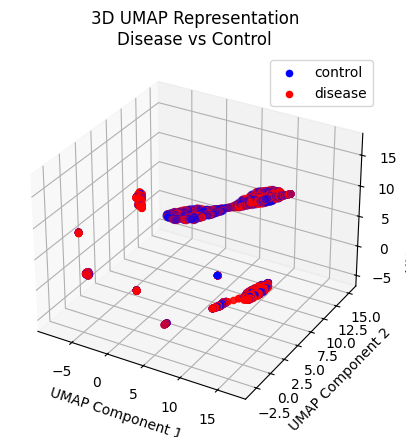

In [ ]:
import matplotlib.pyplot as plt
import umap
from mpl_toolkits.mplot3d import Axes3D

# Perform UMAP with 3 components
umap_model = umap.UMAP(n_components=3)
umap_embedding = umap_model.fit_transform(ref_embed_adata.X)

labels = [assay_id_2_state.get(id.split(";")[1]) for id in adata.obs["ids"]]

# Map labels to colors
label_color_map = {"control": "blue", "disease": "red"}
colors = [label_color_map.get(label, "grey") for label in labels]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Scatter plot with colors
ax.scatter(umap_embedding[:, 0], umap_embedding[:, 1], umap_embedding[:, 2], c=colors)

# Adding legend
for label in label_color_map:
    ax.scatter([], [], [], c=label_color_map[label], label=label)
ax.legend()

# Set labels
ax.set_xlabel("UMAP Component 1")
ax.set_ylabel("UMAP Component 2")
ax.set_zlabel("UMAP Component 3")
ax.set_title("3D UMAP Representation\nDisease vs Control")

# Display the plot
plt.savefig("outputs/umap_3d.disease_control.scgpt.png", dpi=300, bbox_inches="tight")

In [ ]:
import matplotlib.pyplot as plt
import umap
from mpl_toolkits.mplot3d import Axes3D

# Perform UMAP with 3 components
umap_model = umap.UMAP(n_components=3)
umap_embedding = umap_model.fit_transform(ref_embed_adata.X)

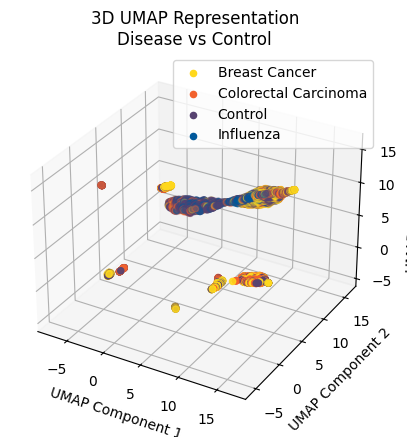

In [ ]:
def get_disease_label(dsaids, df_info=df_info):
    assay_2_tissue = dict(df_info[["dsaid", "disease"]].values)

    if isinstance(dsaids, str):
        return assay_2_tissue.get(dsaids, "None")
    if isinstance(dsaids, list):
        return [assay_2_tissue.get(dsaid, "None") for dsaid in dsaids]


labels = list()
for id in adata.obs["ids"]:
    if id.split(";")[2] == "Control":
        labels.append(id.split(";")[2])
    elif id.split(";")[2] == "Case":
        labels.append(get_disease_label(id.split(";")[0]))
    else:
        labels.append(id.split(";")[2])

# Map labels to colors
irb_colors = [
    "#ffd81cff",
    "#f2612dff",
    "#574270ff",
    "#00589bff",
    "#002f58ff",
]


unique_labels = list(set(labels))
unique_labels.sort()

label_color_map = {k: v for k, v in zip(unique_labels, irb_colors)}
colors = [label_color_map.get(label, "grey") for label in labels]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Scatter plot with colors
ax.scatter(umap_embedding[:, 0], umap_embedding[:, 1], umap_embedding[:, 2], c=colors)

# Adding legend
for label in label_color_map:
    ax.scatter([], [], [], c=label_color_map[label], label=label)
ax.legend()

# Set labels
ax.set_xlabel("UMAP Component 1")
ax.set_ylabel("UMAP Component 2")
ax.set_zlabel("UMAP Component 3")
ax.set_title("3D UMAP Representation\nDisease vs Control")

# Display the plot
plt.savefig("outputs/umap_3d.disease_control.scgpt.png", dpi=300, bbox_inches="tight")

/tmp/ipykernel_116915/2175143349.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], [], c=label_color_map[label], label=label)


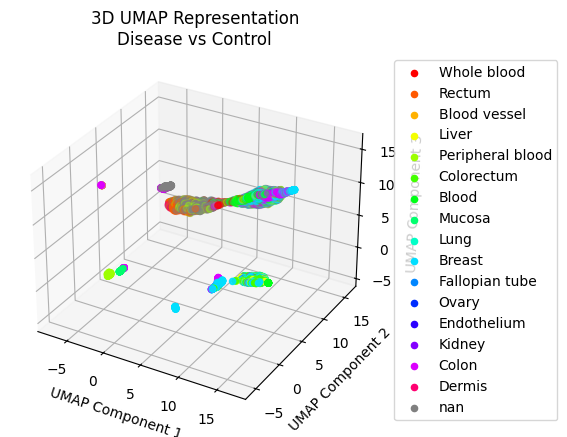

In [ ]:
def get_tissue_label(dsaids, df_info=df_info):
    assay_2_tissue = dict(df_info[["dsaid", "tissue"]].values)
    return [assay_2_tissue.get(dsaid, "None") for dsaid in dsaids]


dsaids = [id.split(";")[0] for id in adata.obs["ids"]]

labels = get_tissue_label(dsaids)

# Filter out NaNs from labels if needed
labels = [str(label) for label in labels]

unique_labels = list(set(labels))

# Get a color map
cmap = plt.get_cmap("hsv")

# Generate a unique color for each unique label
colors = [cmap(i / len(unique_labels)) for i in range(len(unique_labels))]

# Create a mapping from unique labels to colors
label_color_map = {
    label: color for label, color in zip(unique_labels, colors) if str(label) != "nan"
}
label_color_map.update({"nan": (0.5, 0.5, 0.5, 1.0)})

# Map the labels to their corresponding colors
assigned_colors = list()
for label in labels:
    assigned_colors.append(label_color_map[label])

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Scatter plot with colors
ax.scatter(
    umap_embedding[:, 0], umap_embedding[:, 1], umap_embedding[:, 2], c=assigned_colors
)

# Adding legend
for label in label_color_map:
    ax.scatter([], [], [], c=label_color_map[label], label=label)
ax.legend(loc="upper right", bbox_to_anchor=(1.5, 1))

# Set labels
ax.set_xlabel("UMAP Component 1")
ax.set_ylabel("UMAP Component 2")
ax.set_zlabel("UMAP Component 3")
ax.set_title("3D UMAP Representation\nDisease vs Control")

# Display the plot
plt.savefig("outputs/umap_3d.disease_control.scgpt.png", dpi=300, bbox_inches="tight")

/tmp/ipykernel_116915/3559514120.py:75: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], [], c=label_color_map[label], label=label, alpha=1)


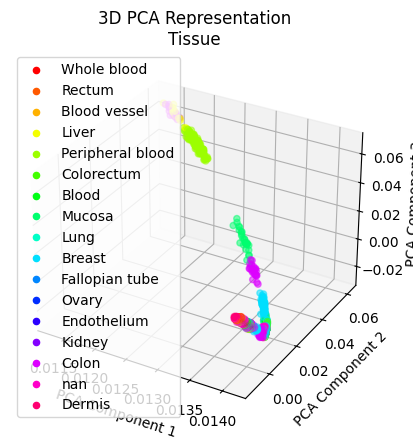

In [ ]:
# Assuming ref_embed_adata and adata are already defined and contain the necessary data

# Perform PCA with 3 components
pca = PCA(n_components=3)
pca.fit(ref_embed_adata.X.T)


def get_tissue_label(dsaids, df_info=df_info):
    assay_2_tissue = dict(df_info[["dsaid", "tissue"]].values)
    return [assay_2_tissue.get(dsaid, "None") for dsaid in dsaids]


dsaids = [id.split(";")[0] for id in adata.obs["ids"]]


def get_disease_label(dsaids, df_info=df_info):
    assay_2_tissue = dict(df_info[["dsaid", "disease"]].values)
    return [assay_2_tissue.get(dsaid, "None") for dsaid in dsaids]


labels = list()
for id in adata.obs["ids"]:
    if id.split(";")[2] == "control":
        labels.append(id.split(";")[2])
    elif id.split(";")[2] == "disease":
        labels.append(get_disease_label(id.split(";")[0]))
    else:
        labels.append(id.split(";")[2])

labels = get_tissue_label(dsaids)

# Filter out NaNs from labels if needed
labels = [str(label) for label in labels]

unique_labels = list(set(labels))

# Get a color map
cmap = plt.get_cmap("hsv")

# Generate a unique color for each unique label
colors = [cmap(i / len(unique_labels)) for i in range(len(unique_labels))]

# Create a mapping from unique labels to colors
label_color_map = {label: color for label, color in zip(unique_labels, colors)}

# Map the labels to their corresponding colors
assigned_colors = list()
for label in labels:
    if isinstance(label, str):
        assigned_colors.append(label_color_map[label])
    else:
        assigned_colors.append(((0.5, 0.5, 0.5, 1.0)))

# Ensure that the lengths of PCA components and assigned_colors match
assert len(pca.components_[0]) == len(
    assigned_colors
), "Length mismatch between PCA components and assigned colors"

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Scatter plot with colors
sc = ax.scatter(
    pca.components_[0],
    pca.components_[1],
    pca.components_[2],
    c=assigned_colors,
    alpha=0.5,
)

# Adding legend
for label in unique_labels:
    if isinstance(label, str):
        ax.scatter([], [], [], c=label_color_map[label], label=label, alpha=1)
    else:
        ax.scatter([], [], [], c="grey", label="nan", alpha=0.1)
# position legend to the left
ax.legend(loc="center left")

# Set labels
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("3D PCA Representation\nTissue")

# Display the plot
plt.savefig("outputs/pca_3d.tissue.scgpt.png", dpi=300, bbox_inches="tight")

/tmp/ipykernel_116915/2998023416.py:65: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], [], c=label_color_map[label], label=label, alpha=1)


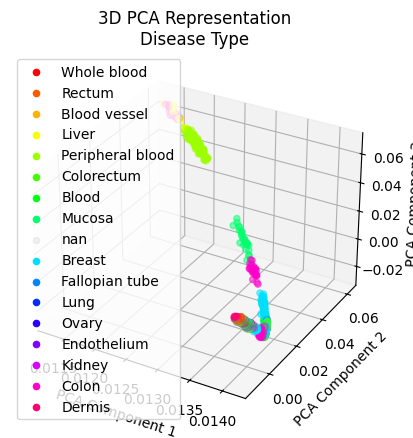

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Assuming ref_embed_adata and adata are already defined and contain the necessary data

# Perform PCA with 3 components
pca = PCA(n_components=3)
pca.fit(ref_embed_adata.X.T)


def get_disease_label(dsaids, df_info=df_info):
    assay_2_tissue = dict(df_info[["dsaid", "disease"]].values)
    return [assay_2_tissue.get(dsaid, "None") for dsaid in dsaids]


dsaids = [id.split(";")[0] for id in adata.obs["ids"]]

labels = get_tissue_label(dsaids)

# Filter out NaNs from labels if needed
labels = [label for label in labels if label is not None]

unique_labels = list(set(labels))

# Get a color map
cmap = plt.get_cmap("hsv")

# Generate a unique color for each unique label
colors = [cmap(i / len(unique_labels)) for i in range(len(unique_labels))]

# Create a mapping from unique labels to colors
label_color_map = {label: color for label, color in zip(unique_labels, colors)}

# Map the labels to their corresponding colors
assigned_colors = list()
for label in labels:
    if isinstance(label, str):
        assigned_colors.append(label_color_map[label])
    else:
        assigned_colors.append(((0.5, 0.5, 0.5, 1.0)))

# Ensure that the lengths of PCA components and assigned_colors match
assert len(pca.components_[0]) == len(
    assigned_colors
), "Length mismatch between PCA components and assigned colors"

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Scatter plot with colors
sc = ax.scatter(
    pca.components_[0],
    pca.components_[1],
    pca.components_[2],
    c=assigned_colors,
    alpha=0.5,
)

# Adding legend
for label in unique_labels:
    if isinstance(label, str):
        ax.scatter([], [], [], c=label_color_map[label], label=label, alpha=1)
    else:
        ax.scatter([], [], [], c="grey", label=label, alpha=0.1)
ax.legend()

# Set labels
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("3D PCA Representation\nDisease Type")

# Display the plot
plt.savefig("outputs/pca_3d.disease_type.scgpt.png", dpi=300, bbox_inches="tight")

/tmp/ipykernel_116915/2725900365.py:65: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], [], c=label_color_map[label], label=label, alpha=1)


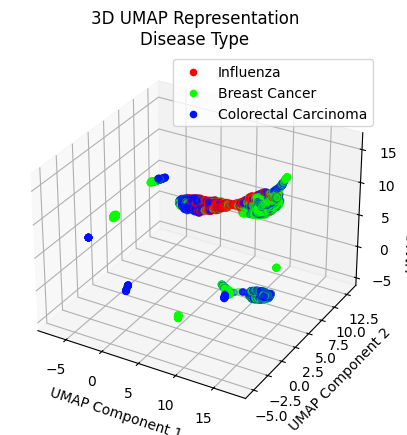

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import umap
from mpl_toolkits.mplot3d import Axes3D

# Assuming ref_embed_adata and adata are already defined and contain the necessary data

# Perform UMAP with 3 components
umap_model = umap.UMAP(n_components=3)
umap_embedding = umap_model.fit_transform(ref_embed_adata.X)


def get_tissue_label(dsaids, df_info=df_info):
    assay_2_tissue = dict(df_info[["dsaid", "disease"]].values)
    return [assay_2_tissue.get(dsaid, "None") for dsaid in dsaids]


dsaids = [id.split(";")[0] for id in adata.obs["ids"]]

labels = get_tissue_label(dsaids)

# Filter out NaNs from labels if needed
labels = [label for label in labels if label is not None]

unique_labels = list(set(labels))

# Get a color map
cmap = plt.get_cmap("hsv")

# Generate a unique color for each unique label
colors = [cmap(i / len(unique_labels)) for i in range(len(unique_labels))]

# Create a mapping from unique labels to colors
label_color_map = {label: color for label, color in zip(unique_labels, colors)}

# Map the labels to their corresponding colors
assigned_colors = list()
for label in labels:
    if isinstance(label, str):
        assigned_colors.append(label_color_map[label])
    else:
        assigned_colors.append(((0.5, 0.5, 0.5, 1.0)))

# Ensure that the lengths of UMAP components and assigned_colors match
assert len(umap_embedding) == len(
    assigned_colors
), "Length mismatch between UMAP components and assigned colors"

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Scatter plot with colors
sc = ax.scatter(
    umap_embedding[:, 0],
    umap_embedding[:, 1],
    umap_embedding[:, 2],
    c=assigned_colors,
    alpha=0.5,
)

# Adding legend
for label in unique_labels:
    if isinstance(label, str):
        ax.scatter([], [], [], c=label_color_map[label], label=label, alpha=1)
    else:
        ax.scatter([], [], [], c="grey", label=label, alpha=0.1)
ax.legend()

# Set labels
ax.set_xlabel("UMAP Component 1")
ax.set_ylabel("UMAP Component 2")
ax.set_zlabel("UMAP Component 3")
ax.set_title("3D UMAP Representation\nDisease Type")

# Display the plot
plt.savefig("outputs/umap_3d.disease_type.scgpt.png", dpi=300, bbox_inches="tight")

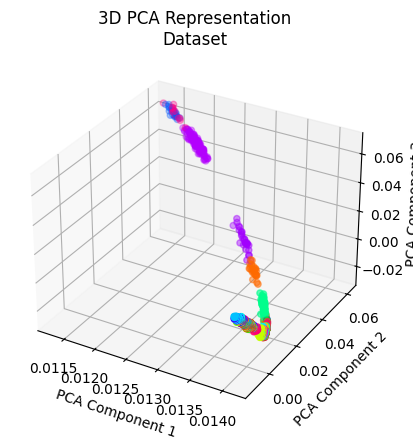

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA with 3 components
pca = PCA(n_components=3)
pca.fit(ref_embed_adata.X.T)

labels = [id.split(";")[0] for id in adata.obs["ids"]]

# Get unique labels
unique_labels = list(set(labels))

# Get a color map
cmap = plt.get_cmap("hsv")

# Generate a unique color for each unique label
colors = [cmap(i / len(unique_labels)) for i in range(len(unique_labels))]

# Create a mapping from unique labels to colors
label_color_map = {label: color for label, color in zip(unique_labels, colors)}

# Map the labels to their corresponding colors
assigned_colors = [label_color_map.get(label, "grey") for label in labels]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Scatter plot with colors
ax.scatter(
    pca.components_[0], pca.components_[1], pca.components_[2], c=assigned_colors
)

# Adding legend
# for label in unique_labels:
#     ax.scatter([], [], [], c=label_color_map[label], label=label, alpha=1)
# ax.legend()

# Set labels
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("3D PCA Representation\nDataset")

# Display the plot
plt.savefig("outputs/pca_3d.dataset.scgpt.png", dpi=300, bbox_inches="tight")

/tmp/ipykernel_116915/3709228074.py:55: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], [], c=label_color_map[label], label=label, alpha=1)


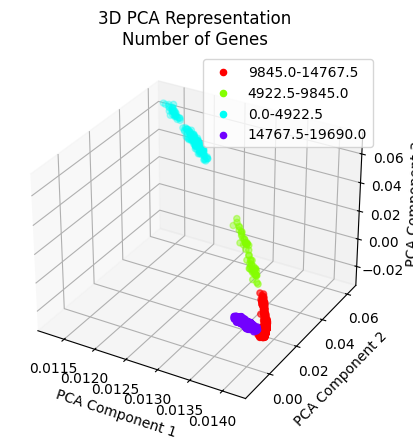

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA with 3 components
pca = PCA(n_components=3)
pca.fit(ref_embed_adata.X.T)


def get_groups_by_counts(n_groups=4, adata=adata):

    labels = list()
    data = (~np.isnan(adata.X)).sum(axis=1)
    bins = np.arange(0, 19690 + 1, 19690 / n_groups)
    for n_genes in data:
        for i, bin in enumerate(bins):
            if i == 0:
                label = f"<={bin}"
            else:
                label = f"{bins[i-1]}-{bin}"
            if n_genes <= bin:
                labels.append(label)
                break

    return labels


labels = get_groups_by_counts(n_groups=4)
# Get unique labels
unique_labels = list(set(labels))

# Get a color map
cmap = plt.get_cmap("hsv")

# Generate a unique color for each unique label
colors = [cmap(i / len(unique_labels)) for i in range(len(unique_labels))]

# Create a mapping from unique labels to colors
label_color_map = {label: color for label, color in zip(unique_labels, colors)}

# Map the labels to their corresponding colors
assigned_colors = [label_color_map.get(label, "grey") for label in labels]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Scatter plot with colors
ax.scatter(
    pca.components_[0], pca.components_[1], pca.components_[2], c=assigned_colors
)

# Adding legend
for label in unique_labels:
    ax.scatter([], [], [], c=label_color_map[label], label=label, alpha=1)
ax.legend()

# Set labels
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("3D PCA Representation\nNumber of Genes")

# Display the plot

plt.savefig("outputs/pca_3d.n_genes.scgpt.png", dpi=300, bbox_inches="tight")

In [ ]:
# compute cosine similarity matrix, pdist and cdist
from scipy.spatial.distance import cosine
from scipy.spatial.distance import pdist, cdist

# cosine similarity matrix
c_matrix = cdist(ref_embed_adata.X, ref_embed_adata.X, "cosine")

# euclidean distance matrix
e_matrix = cdist(ref_embed_adata.X, ref_embed_adata.X, "euclidean")

# pearson correlation matrix
p_matrix = 1 - cdist(ref_embed_adata.X, ref_embed_adata.X, "correlation")

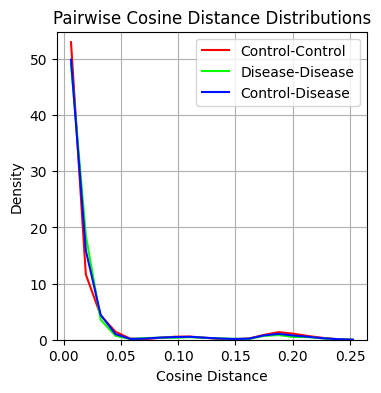

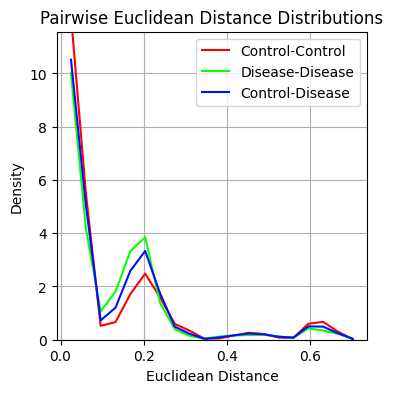

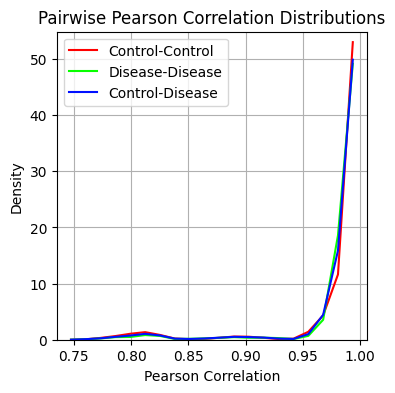

In [ ]:
labels = [assay_id_2_state.get(id.split(";")[1]) for id in adata.obs["ids"]]

# indexes for ctr and dis samples
ctr_indexes = [i for i, label in enumerate(labels) if label == "control"]
dis_indexes = [i for i, label in enumerate(labels) if label == "disease"]


# get from cosine similarity matrix the cosine similarity between ctr and dis samples
c_ctr_ctr = get_pairwise_similarities(c_matrix, ctr_indexes)

c_ctr_dis = get_pairwise_similarities(c_matrix, ctr_indexes, dis_indexes)

c_dis_dis = get_pairwise_similarities(c_matrix, dis_indexes)


plot_metrics(
    [c_ctr_ctr, c_dis_dis, c_ctr_dis],
    ["Control-Control", "Disease-Disease", "Control-Disease"],
    "Cosine Distance",
)


# get from cosine similarity matrix the cosine similarity between control and disease samples
e_ctr_ctr = get_pairwise_similarities(e_matrix, ctr_indexes)

e_ctr_dis = get_pairwise_similarities(e_matrix, ctr_indexes, dis_indexes)

e_dis_dis = get_pairwise_similarities(e_matrix, dis_indexes)

plot_metrics(
    [e_ctr_ctr, e_dis_dis, e_ctr_dis],
    ["Control-Control", "Disease-Disease", "Control-Disease"],
    "Euclidean Distance",
)


# get from cosine similarity matrix the cosine similarity between control and disease samples
p_ctr_ctr = get_pairwise_similarities(p_matrix, ctr_indexes)

p_ctr_dis = get_pairwise_similarities(p_matrix, ctr_indexes, dis_indexes)

p_dis_dis = get_pairwise_similarities(p_matrix, dis_indexes)

plot_metrics(
    [p_ctr_ctr, p_dis_dis, p_ctr_dis],
    ["Control-Control", "Disease-Disease", "Control-Disease"],
    "Pearson Correlation",
)

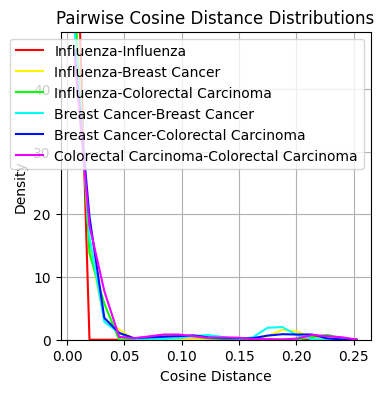

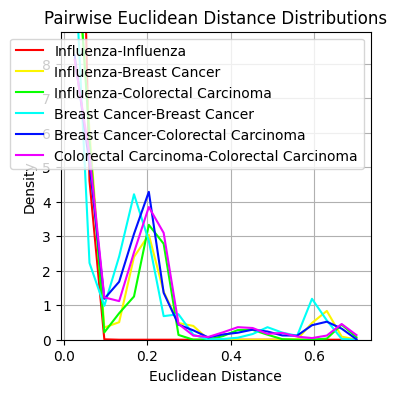

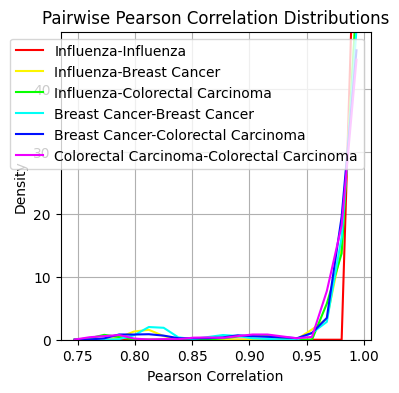

In [ ]:
def get_disease_label(dsaids, df_info=df_info):
    assay_2_tissue = dict(df_info[["dsaid", "disease"]].values)
    return [assay_2_tissue.get(dsaid, "None") for dsaid in dsaids]


_dsaids = [id.split(";")[0] for id in adata.obs["ids"]]

disease_labels = get_disease_label(_dsaids)

idxs = list()
diseases = list(set(disease_labels))
n_diseases = len(diseases)

# get idxs for each disease
for disease in diseases:
    idxs.append([i for i, label in enumerate(disease_labels) if label == disease])

labels = list()
values = list()
for i in range(n_diseases):

    for j in range(i, n_diseases):
        labels.append(f"{diseases[i]}-{diseases[j]}")
        if i == j:
            values.append(get_pairwise_similarities(c_matrix, idxs[i]))
        else:
            values.append(get_pairwise_similarities(c_matrix, idxs[i], idxs[j]))

plot_metrics(values, labels, "Cosine Distance")


labels = list()
values = list()
for i in range(n_diseases):

    for j in range(i, n_diseases):
        labels.append(f"{diseases[i]}-{diseases[j]}")
        if i == j:
            values.append(get_pairwise_similarities(e_matrix, idxs[i]))
        else:
            values.append(get_pairwise_similarities(e_matrix, idxs[i], idxs[j]))

plot_metrics(values, labels, "Euclidean Distance")


labels = list()
values = list()
for i in range(n_diseases):

    for j in range(i, n_diseases):
        labels.append(f"{diseases[i]}-{diseases[j]}")
        if i == j:
            values.append(get_pairwise_similarities(p_matrix, idxs[i]))
        else:
            values.append(get_pairwise_similarities(p_matrix, idxs[i], idxs[j]))

plot_metrics(values, labels, "Pearson Correlation")

## MLP Prediction


In [ ]:
"""MLP Prediction

Structure:  
    1. Imports, Variables, Functions
    2. Define Splits
    3. Train MLP
    4. Evaluate MLP

"""

# 1. Imports, Variables, Functions
# imports
import random
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# variables


# functions
def get_dataset_info(ids, df_info=df_info):
    """Get Disease Information"""
    dsaid_2_accession = dict(zip(df_info["dsaid"], df_info["accession"]))

    dataset_accessions = [dsaid_2_accession[id.split(";")[0]] for id in ids]

    accession_2_id = {k: v for v, k in enumerate(set(dataset_accessions))}
    dataset_ids = [accession_2_id[accession] for accession in dataset_accessions]

    return dataset_accessions, dataset_ids


def get_disease_info(ids, df_info=df_info):
    """Get Disease Information"""
    dsaid_2_disease = dict(zip(df_info["dsaid"], df_info["disease"]))
    disease_types = list()
    for id in ids:
        if id.split(";")[2] == "Control":
            disease_types.append("Control")
        elif id.split(";")[2] == "Case":
            disease_types.append(dsaid_2_disease[id.split(";")[0]])
        else:
            print(f"Error with ID: {id}")

    map_2_id = {k: v for v, k in enumerate(set(disease_types))}

    disease_ids = [map_2_id[x] for x in disease_types]

    return disease_types, disease_ids


# 2. Process Data
logging.info(f"Unfiltered shape: {adata.X.shape}")

# clean unknown values
mask_unknown = [
    False if x.split(";")[2] == "Unknown" else True for x in adata.obs["ids"].values
]
adata_clean = adata[mask_unknown]

embeddings = ref_embed_adata[mask_unknown]

assert adata_clean.X.shape[0] == embeddings.X.shape[0]

logging.info(f"Filter Unknown values shape: {adata_clean.X.shape}")

# generate celltype and celltype_id columns in adata_clean.obs
disease_types, disease_ids = get_disease_info(adata_clean.obs["ids"].values)
adata_clean.obs["celltype"] = disease_types
adata_clean.obs["celltype_id"] = disease_ids

logging.info(f"Counts of each disease type: {Counter(disease_types)}")


# generate dataset ids column in adata_clean.obs
dataset_ids, batch_ids = get_dataset_info(adata_clean.obs["ids"].values)

adata_clean.obs["dataset_id"] = dataset_ids
adata_clean.obs["batch_id"] = batch_ids

logging.info(f"Counts of each dataset id: {Counter(dataset_ids)}")


# 3. Define Splits
# We combine both the disease type with the dataset as to
# shuffle even more the data - minimize bias in train/test split
labels = np.array([a + b for a, b in zip(disease_types, dataset_ids)])

# Generate indices for the data points
indices = np.arange(len(labels))

"""train_test_split cannot handle single label indexes

Because of this we will manually deal with these cases!

"""
indices_single_label = [i for i, x in enumerate(labels) if list(labels).count(x) == 1]
labels_single_label = labels[indices_single_label]

logging.info(f"Nº of single label indexes: {len(indices_single_label)}")


remaining_indices = [i for i in indices if i not in indices_single_label]
remaining_labels = labels[remaining_indices]

# Perform stratified split on the remaining indices
train_indices, test_indices = train_test_split(
    remaining_indices, test_size=0.3, stratify=remaining_labels, random_state=42
)

for idx in indices_single_label:

    if random.random() < 0.2:
        test_indices.append(idx)
    else:
        train_indices.append(idx)


test_indices.sort()
train_indices.sort()

batch_ids = np.zeros(len(labels))
batch_ids[test_indices] = 1


logging.info(f"Nº of train samples: {np.sum(~batch_ids.astype(bool))}")
logging.info(f"Nº of test samples: {np.sum(batch_ids.astype(bool))}")


adata_clean.obs["train_test"] = batch_ids
adata_clean.obs["str_batch"] = batch_ids.astype(int).astype(str)

2024-07-29 10:15:13,705 - Unfiltered shape: (5090, 19690)
2024-07-29 10:15:14,077 - Filter Unknown values shape: (5090, 19690)
/tmp/ipykernel_116915/2257006893.py:72: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_clean.obs["celltype"] = disease_types
2024-07-29 10:15:14,350 - Counts of each disease type: Counter({'Control': 1764, 'Breast Cancer': 1740, 'Colorectal Carcinoma': 1115, 'Influenza': 471})
2024-07-29 10:15:14,354 - Counts of each dataset id: Counter({'GSE54002': 431, 'GSE87211': 361, 'GSE41258': 321, 'GSE55276': 234, 'GSE55277': 234, 'GSE5364': 194, 'GSE45827': 162, 'GSE101702': 157, 'GSE27562': 146, 'GSE24124': 135, 'GSE47756': 127, 'GSE16443': 119, 'GSE42568': 119, 'GSE164191': 119, 'GSE29044': 107, 'GSE37751': 106, 'GSE33113': 94, 'GSE123086': 92, 'GSE9348': 80, 'GSE62932': 79, 'GSE29366': 67, 'GSE29431': 64, 'GSE61304': 58, 'GSE74604': 58, 'GSE10810': 56, 'GSE110933': 48, 'GSE34205': 48, 'GSE36295': 48, 'GSE2

In [ ]:
# define train test adata
adata_train = adata_clean[adata_clean.obs["str_batch"] == "0"]
adata_test = adata_clean[adata_clean.obs["str_batch"] == "1"]

embeddings_train = embeddings[adata_clean.obs["str_batch"] == "0"]
embeddings_test = embeddings[adata_clean.obs["str_batch"] == "1"]

assert adata_train.X.shape[0] == embeddings_train.X.shape[0]
assert adata_test.X.shape[0] == embeddings_test.X.shape[0]

logging.info(f"train shape: {embeddings_train.shape}")
logging.info(f"test shape: {embeddings_test.shape}")

# 3. Train MLP
X_train = embeddings_train.X
# X_train = np.where(np.isnan(adata_train.X), 0, adata_train.X)

y_train = adata_train.obs["celltype"].values


# Create and train the model
mlp = MLPClassifier(
    hidden_layer_sizes=(384, 256, 128, 64),  # Four hidden layers with varying sizes
    activation="relu",  # Activation function for the hidden layers
    solver="adam",  # Optimizer
    max_iter=500,  # Maximum number of iterations
    random_state=42,  # For reproducibility
)
mlp.fit(X_train, y_train)


# 4. Evaluate MLP
X_test = embeddings_test.X
# X_test = np.where(np.isnan(adata_test.X), 0, adata_test.X)
y_test = adata_test.obs["celltype"].values

# Predict
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

sklearn.metrics.f1_score(y_test, y_pred, average="weighted")


print("Predicted labels:", y_pred)
print("Accuracy:", accuracy)

2024-07-29 10:15:17,054 - train shape: (3563, 512)
2024-07-29 10:15:17,055 - test shape: (1527, 512)


Predicted labels: ['Colorectal Carcinoma' 'Colorectal Carcinoma' 'Colorectal Carcinoma' ...
 'Colorectal Carcinoma' 'Colorectal Carcinoma' 'Colorectal Carcinoma']
Accuracy: 0.5245579567779961


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

report = classification_report(y_test, y_pred, output_dict=True)

print(report)

{'Breast Cancer': {'precision': 0.5342465753424658, 'recall': 0.8187022900763359, 'f1-score': 0.6465712132629993, 'support': 524.0}, 'Colorectal Carcinoma': {'precision': 0.5079872204472844, 'recall': 0.47604790419161674, 'f1-score': 0.49149922720247297, 'support': 334.0}, 'Control': {'precision': 0.5182481751824818, 'recall': 0.4034090909090909, 'f1-score': 0.4536741214057508, 'support': 528.0}, 'Influenza': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 141.0}, 'accuracy': 0.5245579567779961, 'macro avg': {'precision': 0.39012049274305793, 'recall': 0.4245398212942609, 'f1-score': 0.3979361404678058, 'support': 1527.0}, 'weighted avg': {'precision': 0.4736397993485235, 'recall': 0.5245579567779961, 'f1-score': 0.48625015961864704, 'support': 1527.0}}


/home/ddalton/miniconda3/envs/scgpt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ddalton/miniconda3/envs/scgpt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ddalton/miniconda3/envs/scgpt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [ ]:
report_df = pd.DataFrame(report).transpose()
# Drop non-label rows (accuracy, macro avg, weighted avg)
report_df.drop(index=["accuracy", "macro avg", "weighted avg"], inplace=True)
report_df.drop(columns=["support"], inplace=True)

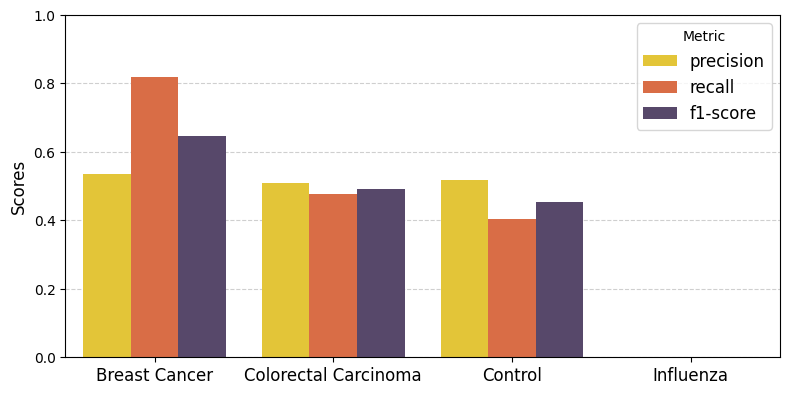

In [ ]:
import seaborn as sns

irb_colors = [
    "#ffd81cff",
    "#f6972dff",
    "#f2612dff",
    "#574270ff",
    "#00589bff",
    "#002f58ff",
]

# Creating the dataframe in a long format for seaborn
df_long = report_df.reset_index().melt(
    id_vars="index", var_name="Metric", value_name="Score"
)
df_long.columns = ["Condition", "Metric", "Score"]

custom_palette = {
    "precision": irb_colors[0],  # Blue
    "recall": irb_colors[2],  # Orange
    "f1-score": irb_colors[3],  # Green
}

# Plotting with seaborn
plt.figure(figsize=(8, 4))
sns.barplot(
    x="Condition",
    y="Score",
    hue="Metric",
    data=df_long,
    palette=custom_palette,
    zorder=2,
)

plt.grid(axis="y", linestyle="--", alpha=0.6, zorder=-3)

# Adding labels and title
plt.xlabel("")
plt.ylabel("Scores", fontsize=12)
plt.title("")

plt.legend(title="Metric", loc="upper right", fontsize=12)
plt.xticks(fontsize=12)

plt.tight_layout()
plt.ylim(0, 1)

plt.savefig(
    "outputs/classification_report_metrics_vertical.scgpt.png",
    dpi=300,
    bbox_inches="tight",
)


plt.show()

In [ ]:
sklearn.metrics.f1_score(y_test, y_pred, average="weighted")

0.48625015961864704

/home/ddalton/miniconda3/envs/scgpt/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


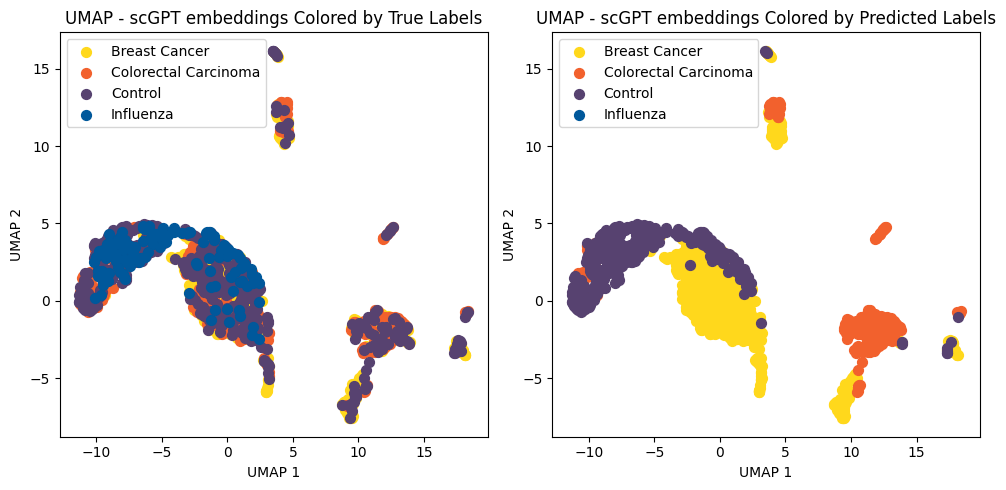

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your labels and corresponding colors
labels = np.unique(y_test)

irb_colors = [
    "#ffd81cff",
    "#f2612dff",
    "#574270ff",
    "#00589bff",
]


# Create UMAP embeddings
reducer = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=42)
X_test_umap = reducer.fit_transform(X_test)


color_map = {label: color for label, color in zip(labels, irb_colors)}

# Plotting the UMAP results
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# UMAP colored by true labels
for label in labels:
    idx = y_test == label
    axes[0].scatter(
        X_test_umap[idx, 0], X_test_umap[idx, 1], c=color_map[label], label=label, s=50
    )
axes[0].set_title("UMAP - scGPT embeddings Colored by True Labels")
axes[0].legend()
axes[0].set_xlabel("UMAP 1")
axes[0].set_ylabel("UMAP 2")

# UMAP colored by predicted labels
for label in labels:
    idx = y_pred == label
    axes[1].scatter(
        X_test_umap[idx, 0], X_test_umap[idx, 1], c=color_map[label], label=label, s=50
    )
axes[1].set_title("UMAP - scGPT embeddings Colored by Predicted Labels")
axes[1].legend()
axes[1].set_xlabel("UMAP 1")
axes[1].set_ylabel("UMAP 2")

plt.tight_layout()
plt.savefig("outputs/umap_raw_data_pred_labels.scgpt.png", dpi=300, bbox_inches="tight")

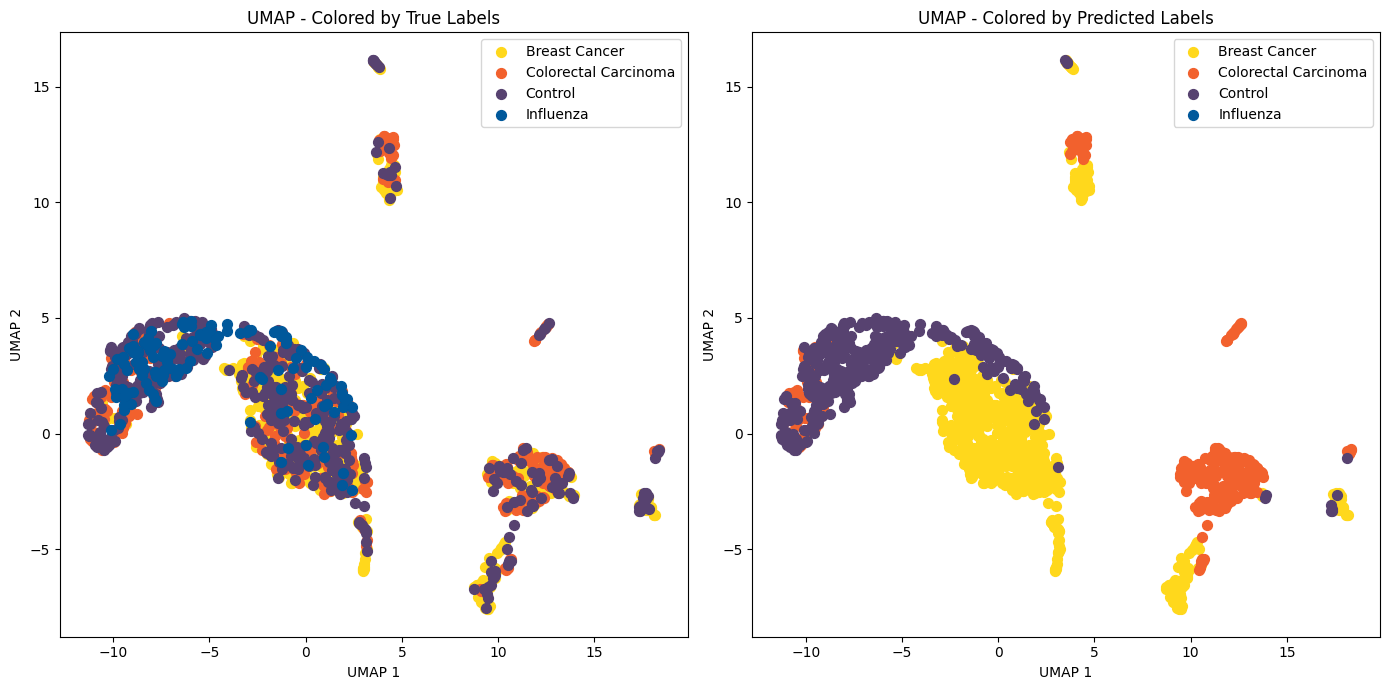

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your labels and corresponding colors
labels = np.unique(y_test)

irb_colors = [
    "#ffd81cff",
    "#f2612dff",
    "#574270ff",
    "#00589bff",
]

color_map = {label: color for label, color in zip(labels, irb_colors)}

# Plotting the UMAP results
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# UMAP colored by true labels
for label in labels:
    idx = y_test == label
    axes[0].scatter(
        X_test_umap[idx, 0], X_test_umap[idx, 1], c=color_map[label], label=label, s=50
    )
axes[0].set_title("UMAP - Colored by True Labels")
axes[0].legend()
axes[0].set_xlabel("UMAP 1")
axes[0].set_ylabel("UMAP 2")

# UMAP colored by predicted labels
for label in labels:
    idx = y_pred == label
    axes[1].scatter(
        X_test_umap[idx, 0], X_test_umap[idx, 1], c=color_map[label], label=label, s=50
    )
axes[1].set_title("UMAP - Colored by Predicted Labels")
axes[1].legend()
axes[1].set_xlabel("UMAP 1")
axes[1].set_ylabel("UMAP 2")

plt.tight_layout()
plt.show()